In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/datasets.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets.zip
replace datasets/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
mnist_train = pd.read_csv('/content/datasets/mnist-in-csv/mnist_train.csv')
mnist_test = pd.read_csv('/content/datasets/mnist-in-csv/mnist_test.csv')

In [0]:
mnist_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
img = mnist_train[1:2]

img = img.drop('label', axis = 1)

In [0]:
img = img.values

img.shape

(1, 784)

In [0]:
img = img.reshape(1, 28, 28)

img.shape

(1, 28, 28)

In [0]:
img = img.squeeze()

img.shape

(28, 28)

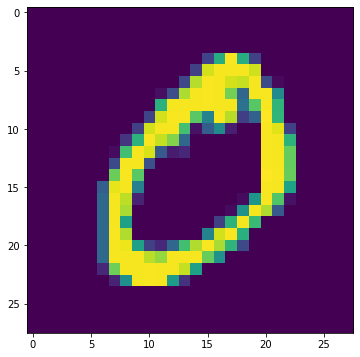

In [0]:
plt.figure(figsize = (6, 6))

plt.imshow(img)

In [0]:
mnist_train.isna().any()

label    False
1x1      False
1x2      False
1x3      False
1x4      False
         ...  
28x24    False
28x25    False
28x26    False
28x27    False
28x28    False
Length: 785, dtype: bool

In [0]:
mnist_train = mnist_train.dropna()
mnist_test = mnist_test.dropna()

In [0]:
mnist_train_features = mnist_train.drop('label', axis = 1)
mnist_train_target = mnist_train['label']

mnist_test_features = mnist_test.drop('label', axis = 1)
mnist_test_target = mnist_test['label']


In [0]:
mnist_train_features.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,2x12,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
mnist_train_target.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [0]:
print("train max - ", mnist_train.values.max())
print("train min -", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min -", mnist_test.values.min())

train max -  255
train min - 0
test max -  255
test min - 0


Converting our train and test data to float for better performance of of model

In [0]:
mnist_train = mnist_train.astype('float32')

mnist_train = mnist_train/255

In [0]:
mnist_test = mnist_test.astype('float32')

mnist_test = mnist_test/255

In [0]:
print("train max - ", mnist_train.values.max())
print("train min -", mnist_train.values.min())
print("test max - ", mnist_test.values.max())
print("test min -", mnist_test.values.min())

train max -  1.0
train min - 0.0
test max -  1.0
test min - 0.0


In [0]:
import torch

In [0]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype = torch.float)
X_test_tensor = torch.tensor(mnist_test_features.values, dtype = torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype = torch.long)
Y_test_tensor = torch.tensor(mnist_test_target.values, dtype = torch.long)

In [0]:
X_train_tensor.shape, Y_train_tensor.shape

(torch.Size([60000, 784]), torch.Size([60000]))

In [0]:
X_test_tensor.shape, Y_test_tensor.shape

(torch.Size([10000, 784]), torch.Size([10000]))

In [0]:
import torch.nn as nn

In [0]:
input_size = 784
output_size = 10

hidden_size1 = 16
hidden_size2 = 32

In [0]:
class Net(nn.Module):

  def __init__(self):

    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.fc3 = nn.Linear(hidden_size2, output_size)

  def forward(self, x):
    x = torch.sigmoid(self.fc1(x))
    x = torch.sigmoid(self.fc2(x))

    x = self.fc3(x)

    return torch.log_softmax(x, dim = -1)



In [0]:
model = Net()

In [0]:
device = torch.device("cuda: 0" if torch.cuda.is_available() else
                      "cpu")

device

device(type='cuda', index=0)

In [0]:
model.to(device)

Net(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)

In [0]:
X_train_tensor = X_train_tensor.to(device)

In [0]:
X_test_tensor  = X_test_tensor.to(device) 

Y_train_tensor = Y_train_tensor.to(device)
Y_test_tensor  = Y_test_tensor.to(device)

In [0]:
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

loss_fn = nn.NLLLoss()

In [0]:
epoch = 2500

for epoch in range(1, epoch + 1):

  optimizer.zero_grad()
  Y_pred = model(X_train_tensor)

  loss = loss_fn(Y_pred, Y_train_tensor)
  loss.backward()

  optimizer.step()

  if epoch % 10 == 0:

    print("Epoch --> %d, loss --> %0.2f" %(epoch, loss.item()))

Epoch --> 10, loss --> 2.31
Epoch --> 20, loss --> 2.28
Epoch --> 30, loss --> 2.26
Epoch --> 40, loss --> 2.25
Epoch --> 50, loss --> 2.24
Epoch --> 60, loss --> 2.22
Epoch --> 70, loss --> 2.21
Epoch --> 80, loss --> 2.20
Epoch --> 90, loss --> 2.19
Epoch --> 100, loss --> 2.17
Epoch --> 110, loss --> 2.15
Epoch --> 120, loss --> 2.14
Epoch --> 130, loss --> 2.12
Epoch --> 140, loss --> 2.10
Epoch --> 150, loss --> 2.08
Epoch --> 160, loss --> 2.06
Epoch --> 170, loss --> 2.03
Epoch --> 180, loss --> 2.01
Epoch --> 190, loss --> 1.98
Epoch --> 200, loss --> 1.95
Epoch --> 210, loss --> 1.92
Epoch --> 220, loss --> 1.89
Epoch --> 230, loss --> 1.86
Epoch --> 240, loss --> 1.83
Epoch --> 250, loss --> 1.80
Epoch --> 260, loss --> 1.77
Epoch --> 270, loss --> 1.73
Epoch --> 280, loss --> 1.70
Epoch --> 290, loss --> 1.67
Epoch --> 300, loss --> 1.63
Epoch --> 310, loss --> 1.60
Epoch --> 320, loss --> 1.57
Epoch --> 330, loss --> 1.54
Epoch --> 340, loss --> 1.51
Epoch --> 350, loss -->

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
with torch.no_grad():
  correct = 0
  total = 0

  output = model(X_test_tensor)
  _, predicted = torch.max(output.data, 1)

  y_test = Y_test_tensor.cpu().numpy()
  predicted = predicted.cpu()

  print("Accuracy: ", accuracy_score(predicted, y_test))
  print("Precision: ", precision_score(predicted, y_test, average = 'weighted'))
  print("Recall: ", recall_score(predicted, y_test, average= 'weighted'))

Accuracy:  0.8981
Precision:  0.8990097927332829
Recall:  0.8981


In [0]:
print("Sample target data -->", mnist_test_target.values[1005])

Sample target data --> 9


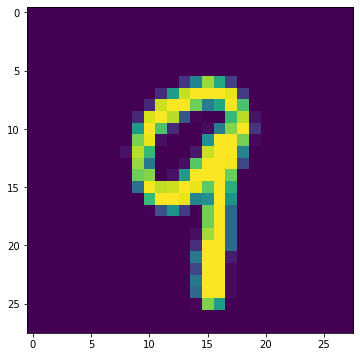

In [0]:
sample_img = mnist_test_features.values[1005]
sample_img = sample_img.reshape(1, 28, 28)

sample_img = sample_img[0, :, :]

plt.figure(figsize = (6, 6))
plt.imshow(sample_img)

In [0]:
sample = np.array(mnist_test_features.values[1005])

sample_tensor = torch.from_numpy(sample).float()

In [0]:
y_pred = model(sample_tensor.to(device))
y_pred

tensor([ -8.5742,  -5.5103,  -7.1500,  -5.2988,  -4.4059,  -9.0276, -10.8709,
         -2.9312,  -5.5557,  -0.0829], device='cuda:0',
       grad_fn=<LogSoftmaxBackward>)

In [0]:
_, predicted = torch.max(y_pred.data, -1)

In [0]:
print (" The predicted label is : ", predicted.item())

 The predicted label is :  9


In [0]:
print("Sample target data -->", mnist_test_target.values[2001])

Sample target data --> 5


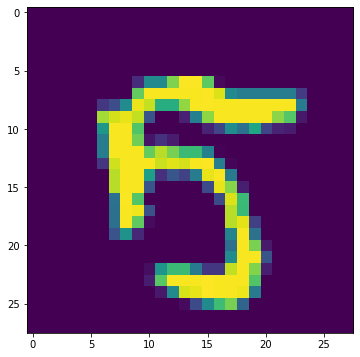

In [0]:
sample_img = mnist_test_features.values[2001]
sample_img = sample_img.reshape(1, 28, 28)

sample_img = sample_img[0, :, :]

plt.figure(figsize = (6, 6))
plt.imshow(sample_img)

In [0]:
sample = np.array(mnist_test_features.values[2001])

sample_tensor = torch.from_numpy(sample).float()

In [0]:
y_pred = model(sample_tensor.to(device))
y_pred

tensor([-1.7212, -8.5890, -6.4144, -4.1128, -4.7529, -1.8729, -5.5625, -5.9684,
        -0.5339, -3.0375], device='cuda:0', grad_fn=<LogSoftmaxBackward>)

In [0]:
_, predicted = torch.max(y_pred.data, -1)

In [0]:
print (" The predicted label is : ", predicted.item())

 The predicted label is :  8
